# Breast Cancer Detection

Convolutional Neural Network using Tensorflow & Keras

October, 19, 2021
Trent McNabb & Scott Stimpson

In [1]:
# import dependencies
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

### Data Exploration, Cleaning & Preprocessing

In [2]:
# loading the data downloaded on the local machine
directory = ('/Users/trent/Downloads/resources/')
folders = os.listdir(directory)

#remove unused folders
folders.remove('IDC_regular_ps50_idx5')
folders.remove('.DS_Store')

#create list to hold folder names
test_folders = []
train_folders = []
count = 0
flag = 0


for folder in folders:
    class_zero = os.listdir(directory+folder+'/0/')
    count += len(class_zero)
    class_one = os.listdir(directory+folder+'/1/')
    count += len(class_one)
    if count > 222000:
        flag = 1
    if flag:
        test_folders.append(folder)
    else:
        train_folders.append(folder) 
print(count)

277524


In [3]:
train_image_paths = []
test_image_paths = []

for folder_name in train_folders:
    class_zero = os.listdir(directory+folder_name+'/0/')
    class_one = os.listdir(directory+folder_name+'/1/')
    if '.DS_Store' in class_zero:
        class_zero.remove('.DS_Store')
    if '.DS_Store' in class_one:
        class_one.remove('.DS_Store')
    for path in class_zero:
        train_image_paths.append(directory+folder_name+'/0/'+path)
    for path in class_one:
        train_image_paths.append(directory+folder_name+'/1/'+path)
for folder_name in test_folders:
    class_zero = os.listdir(directory+folder_name+'/0/')
    class_one = os.listdir(directory+folder_name+'/1/')
    if '.DS_Store' in class_zero:
        class_zero.remove('.DS_Store')
    if '.DS_Store' in class_one:
        class_one.remove('.DS_Store')
    for path in class_zero:
        test_image_paths.append(directory+folder_name+'/0/'+path)
    for path in class_one:
        test_image_paths.append(directory+folder_name+'/1/'+path)

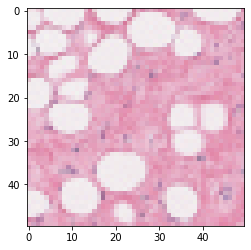

zero: 196454
one: 78768
bad: 0
removed due to shape: 2302


In [5]:

X_train = []
y_train = []
X_test = []
y_test = []

class_zero_count = 0
class_one_count = 0
general_badness_count = 0
removed = 0
image_path=test_image_paths[0]

#display sample image
image = tf.keras.preprocessing.image.load_img(image_path)
plt.imshow(image)
plt.show()

#use Keras.preprocessing to load training images and convert to array
for path in train_image_paths:
    class_number = 2
    image = tf.keras.preprocessing.image.load_img(path)
    image_arr = tf.keras.preprocessing.image.img_to_array(image)
    
    #label each image
    if(image_arr.shape == (50,50,3)):
        if path.endswith('class0.png'):
            class_number = 0
            class_zero_count += 1
        elif path.endswith('class1.png'):
            class_number = 1
            class_one_count += 1
        else:
            class_number = 2
            general_badness_count += 1
        X_train.append(image_arr)
        y_train.append(class_number)
    else:
        removed += 1

#use Keras.preprocessing to load testing images and convert to array
for path in test_image_paths:
    class_number = 2
    image = tf.keras.preprocessing.image.load_img(path)
    image_arr = tf.keras.preprocessing.image.img_to_array(image)
    if(image_arr.shape == (50,50,3)):
        if path.endswith('class0.png'):
            class_number = 0
            class_zero_count += 1
        elif path.endswith('class1.png'):
            class_number = 1
            class_one_count += 1
        else:
            class_number = 2
            general_badness_count += 1
        X_test.append(image_arr)
        y_test.append(class_number)
    else:
        removed +=1
print(f'zero: {class_zero_count}')
print(f'one: {class_one_count}')      
print(f'bad: {general_badness_count}')
print(f'removed due to shape: {removed}')

### Model Training

Sequential class model with 3 layers of Maxpooling2D & Conv2D. This is flattened into a 1D feature array.
Softmax - Softmax converts a vector of values to a probability distribution. The elements of the output vector are in range (0, 1) and sum to 1.

In [6]:

model = tf.keras.models.Sequential()

#starting with 32 filters and (3,3) kernel size
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten()) # converts the 3D feature maps to 1D feature vector
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

### Normalizing the Data

In [8]:
# using Numpy to transform the images to an array
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

In [9]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
y_train
for y in y_train:
    if (y != 1 and y !=0):
        print(y)

In [10]:
# train model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=4,validation_data=(X_test_scaled, y_test))

Epoch 1/4
6831/6831 [==============================] - 463s 68ms/step - loss: 0.3907 - accuracy: 0.8320 - val_loss: 0.3691 - val_accuracy: 0.8367
Epoch 2/4
6831/6831 [==============================] - 432s 63ms/step - loss: 0.3485 - accuracy: 0.8515 - val_loss: 0.3554 - val_accuracy: 0.8449
Epoch 3/4
6831/6831 [==============================] - 412s 60ms/step - loss: 0.3335 - accuracy: 0.8584 - val_loss: 0.3442 - val_accuracy: 0.8504
Epoch 4/4
6831/6831 [==============================] - 407s 60ms/step - loss: 0.3249 - accuracy: 0.8620 - val_loss: 0.3270 - val_accuracy: 0.8579


In [11]:
#print(model.metrics_names)
#scores = model.evaluate(X_test_scaled,y_test)
#scores
y_preds = model.predict(X_test_scaled)
y_preds

array([[0.9930085 , 0.0069915 ],
       [0.41924006, 0.58076   ],
       [0.9893607 , 0.01063934],
       ...,
       [0.3209223 , 0.67907774],
       [0.6028274 , 0.39717257],
       [0.6026481 , 0.39735198]], dtype=float32)

In [ ]:
model_one = tf.keras.models.Sequential()
#starting with 32 filters and (3,3) kernel size
model_one.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model_one.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_one.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_one.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_one.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_one.add(tf.keras.layers.Flatten()) # converts the 3D feature maps to 1D feature vector
model_one.add(tf.keras.layers.Dense(64, activation='relu'))
model_one.add(tf.keras.layers.Dense(2,activation='softmax'))

In [12]:
model.save('saved_model.h5')

In [ ]:
model_one.summary()

In [ ]:
model_one.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_one.fit(X_train_scaled, y_train, epochs=1,validation_data=(X_test_scaled, y_test))

In [ ]:
loaded_model = tf.keras.models.load_model('saved_model.h5')
scores = loaded_model.evaluate(X_test_scaled,y_test)
scores

In [ ]:
y_preds = loaded_model.predict(X_test_scaled)
y_preds

In [13]:
y_preds_binary = []
for y in y_preds:
    if y[0] > .5:
        y_preds_binary.append(0)
    else:
        y_preds_binary.append(1)
y_preds_binary

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


### Confusion Matrix

In [14]:
tf.math.confusion_matrix(y_test,y_preds_binary)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[34242,  3063],
       [ 4984, 14345]], dtype=int32)>

In [ ]:
loaded_model.summary()